# <center> Descriptive Statistics

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Iris dataset
iris = datasets.load_iris()

In [3]:
# Display basic information about the dataset
print("Dataset shape:", iris.data.shape)
print("Number of classes:", len(set(iris.target)))
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Dataset shape: (150, 4)
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
# Making DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Creating function to add the range, IQR, skewness and mode to the describe() dataset
def custom_describe(df):
    desc = df.describe()
    
    # Adding range
    desc.loc['range'] = desc.loc['max'] - desc.loc['min']
    
    # Adding IQR
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    desc.loc['IQR'] = q3 - q1
    
    # Adding skewness
    desc.loc['skewness'] = df.skew()
    
    # Adding mode
    desc.loc['mode'] = df.mode().iloc[0]
    
    # Reordering rows
    new_order = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'range', 'IQR', 'skewness', 'mode']
    desc = desc.reindex(new_order)
    
    return desc

extended_describe = custom_describe(df)

In [8]:
# Final 
extended_describe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000
IQR,1.300000,0.500000,3.500000,1.500000


# Visualizing Distribution

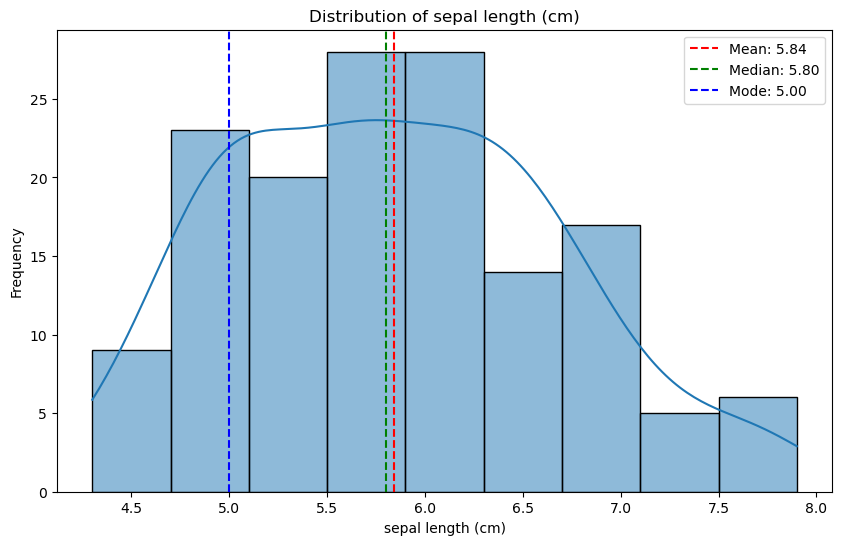

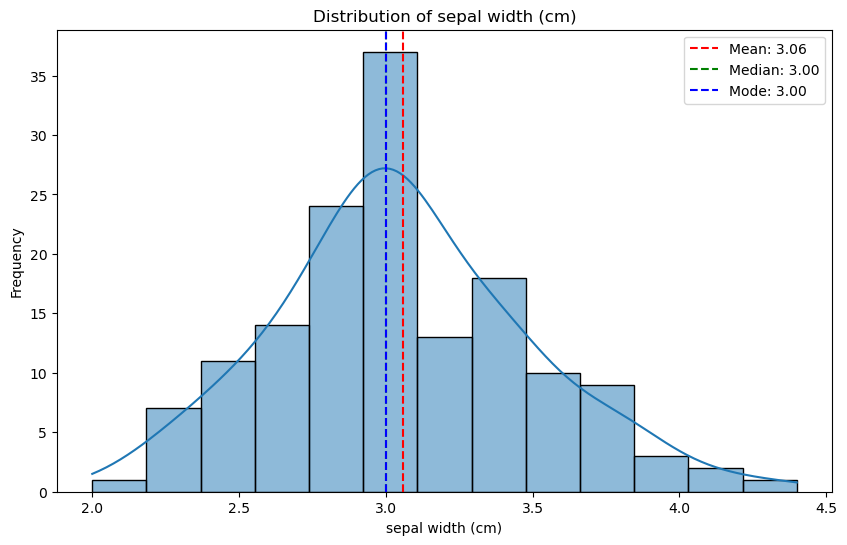

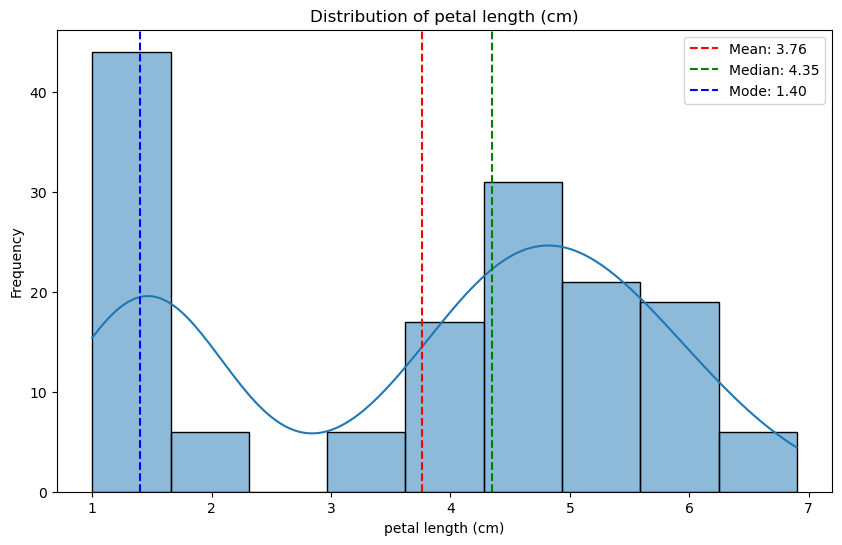

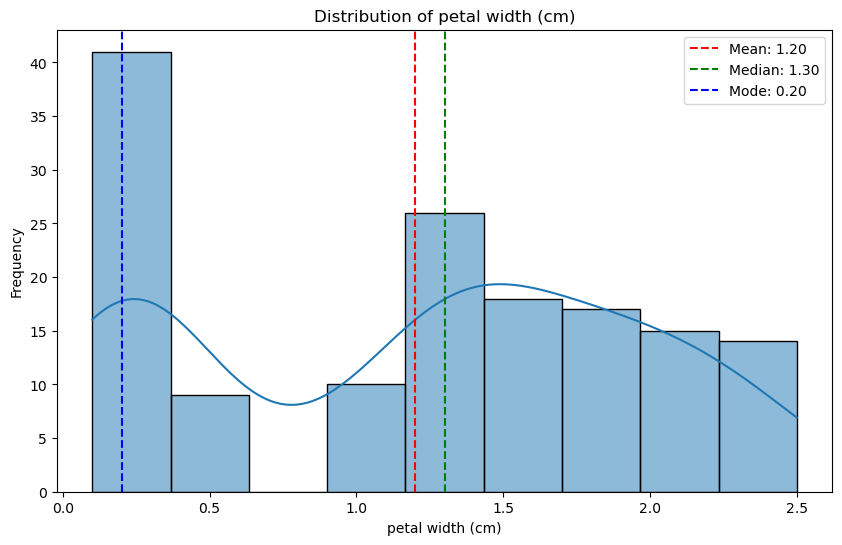

In [9]:
# Creating a function to plot and visualize the distribution
def plot_feature_distribution(df, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    
    mean = df[feature].mean()
    median = df[feature].median()
    mode = df[feature].mode().iloc[0]
    
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.2f}')
    plt.axvline(mode, color='b', linestyle='--', label=f'Mode: {mode:.2f}')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot distribution for each feature
for feature in df.columns:
    plot_feature_distribution(df, feature)